In [19]:
import random
import pandas as pd

In [20]:
hostnames = []
dataset = []
df = None

In [21]:
def set_codigos_hostnames(number_of_hosts: int) -> None:
  sistemas_operativos = ['L']*40 + ['S']*30 + ['A']*20 + ['H']*10 #40% Linux 30% Solaris 20% AIX 10% HP-UX
  entornos = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30 #Development: 10% Integration: 10% Testing: 25% Staging: 25% Production: 30%
  paises = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30 #Norway: 6% France: 9% Italy: 16% Spain: 16% Germany: 23% Ireland: 30%
  grupo_alpha = []

  for i in range(number_of_hosts):
    hostname = random.choice(sistemas_operativos)
    ubicacion = random.choice(entornos) + random.choice(paises)
    hostname += ubicacion
    grupo_alpha.append(hostname)
    hostname += str(grupo_alpha.count(hostname)).zfill(3)
    hostnames.append(hostname)


In [22]:
def get_sistema(codigo_hostname: str) -> str:
  if codigo_hostname.startswith('L'):
    return 'Linux'
  elif codigo_hostname.startswith('S'):
    return 'Solaris'
  elif codigo_hostname.startswith('A'):
    return 'AIX'
  elif codigo_hostname.startswith('H'):
    return 'HP-UX'
  else:
    return 'unknown'

In [23]:
def get_entorno(codigo_hostname: str) -> str:
  if codigo_hostname[1] == 'D':
    return 'Development'
  elif codigo_hostname[1] == 'I':
    return 'Integration'
  elif codigo_hostname[1] == 'T':
    return 'Testing'
  elif codigo_hostname[1] == 'S':
    return 'Staging'
  elif codigo_hostname[1] == 'P':
    return 'Production'
  else:
    return 'unknown'

In [24]:
def get_pais(codigo_hostname: str) -> str:
  if codigo_hostname[2:5] == 'NOR':
    return 'Norway'
  elif codigo_hostname[2:5] == 'FRA':
    return 'France'
  elif codigo_hostname[2:5] == 'ITA':
    return 'Italy'
  elif codigo_hostname[2:5] == 'ESP':
    return 'Spain'
  elif codigo_hostname[2:5] == 'DEU':
    return 'Germany'
  elif codigo_hostname[2:5] == 'IRL':
    return 'Ireland'
  else:
    return 'unknown'

In [25]:
def set_dataframe(numero: int) -> None:
  global df

  set_codigos_hostnames(numero)

  for codigo_hostname in hostnames:
    dataset.append({
        'hostname': codigo_hostname,
        'os': get_sistema(codigo_hostname),
        'enviroment': get_entorno(codigo_hostname),
        'country': get_pais(codigo_hostname),
        'node': int(codigo_hostname[-3:])


    })


    df= pd.DataFrame(dataset)

In [26]:
set_dataframe(1500)

In [27]:
df

,hostname,os,enviroment,country,node
0,LTDEU001,Linux,Testing,Germany,1
1,ASIRL001,AIX,Staging,Ireland,1
2,LTESP001,Linux,Testing,Spain,1
3,SSDEU001,Solaris,Staging,Germany,1
4,HTITA001,HP-UX,Testing,Italy,1
...,...,...,...,...,...
1495,SSITA014,Solaris,Staging,Italy,14
1496,LPITA037,Linux,Production,Italy,37
1497,SSITA015,Solaris,Staging,Italy,15
1498,ASFRA005,AIX,Staging,France,5


In [28]:
from google.colab import drive
import os
drive.mount('/content/drive')
mi_directorio = '/content/drive/My Drive/UCM'
os.chdir(mi_directorio)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df.to_csv('hosts.csv', index=False, header=True)
hosts_df = pd.read_csv('hosts.csv')
print(hosts_df)

      hostname       os  enviroment  country  node
0     LTDEU001    Linux     Testing  Germany     1
1     ASIRL001      AIX     Staging  Ireland     1
2     LTESP001    Linux     Testing    Spain     1
3     SSDEU001  Solaris     Staging  Germany     1
4     HTITA001    HP-UX     Testing    Italy     1
...        ...      ...         ...      ...   ...
1495  SSITA014  Solaris     Staging    Italy    14
1496  LPITA037    Linux  Production    Italy    37
1497  SSITA015  Solaris     Staging    Italy    15
1498  ASFRA005      AIX     Staging   France     5
1499  ASITA013      AIX     Staging    Italy    13

[1500 rows x 5 columns]


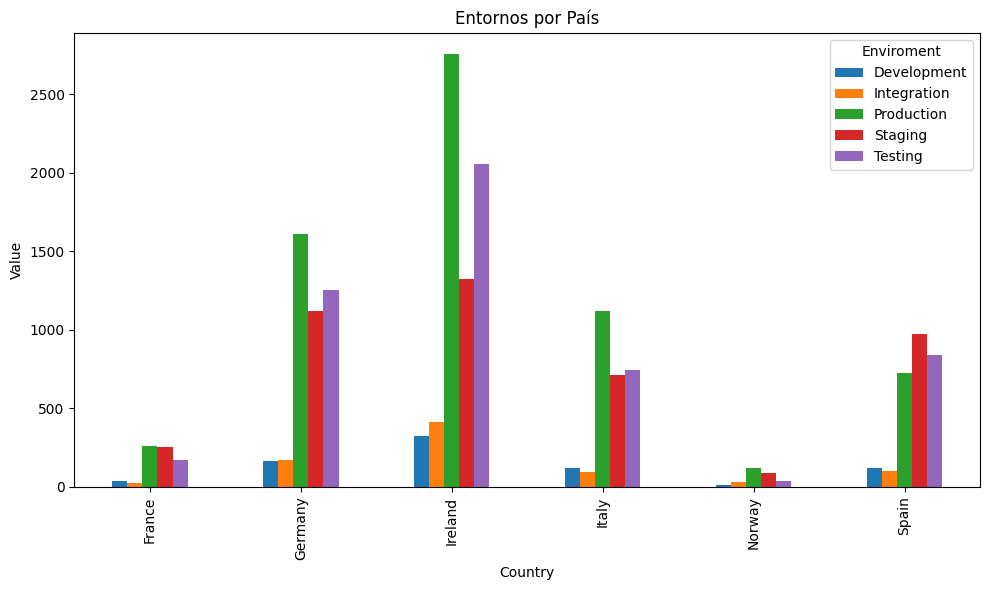

In [30]:
import matplotlib.pyplot as plt


grouped = df.groupby(['country', 'enviroment'])['node'].sum()


unstacked = grouped.unstack()


unstacked.plot(kind='bar', figsize=(10, 6))
plt.title("Entornos por País")
plt.xlabel("Country")
plt.ylabel("Value")
plt.legend(title="Enviroment")
plt.tight_layout()
plt.show()



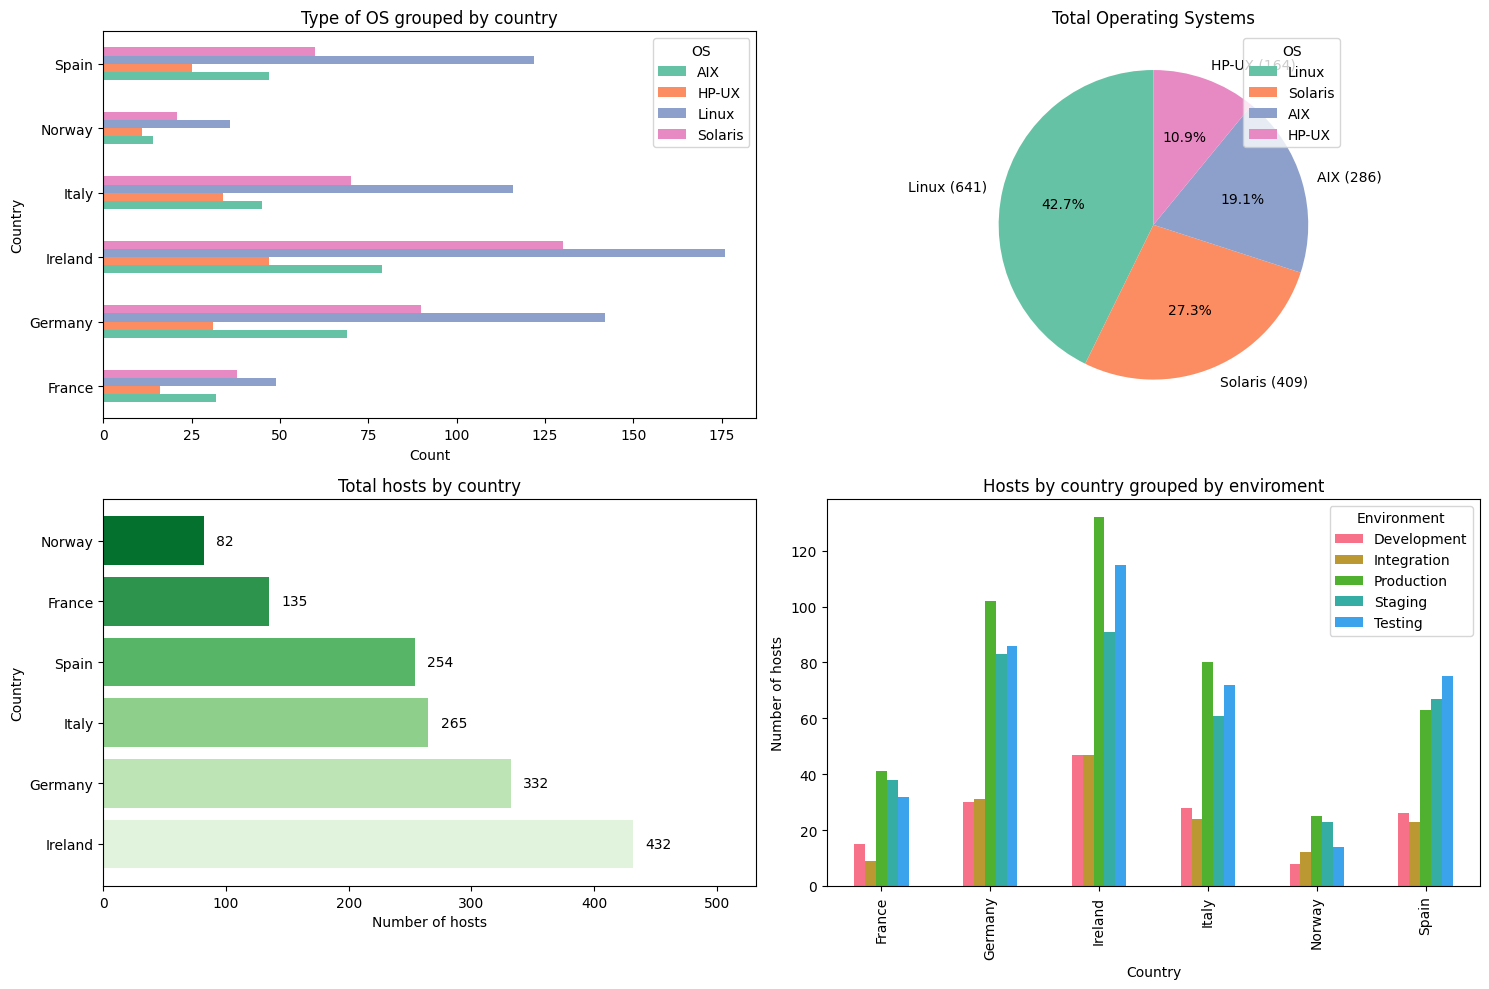

In [31]:
import seaborn as sns


# Gráfico 1
grouped_os = df.groupby(['country', 'os']).size().unstack()
colors_os = sns.color_palette("Set2")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

grouped_os.plot(kind='barh', ax=axes[0, 0], stacked=False, color=colors_os)
axes[0, 0].set_title("Type of OS grouped by country")
axes[0, 0].set_xlabel("Count")
axes[0, 0].set_ylabel("Country")
axes[0, 0].legend(title="OS", loc="best")

# Gráfico 2
total_os = df['os'].value_counts()
labels = [f"{os} ({count})" for os, count in zip(total_os.index, total_os)]
axes[0, 1].pie(total_os, labels=labels,autopct='%1.1f%%', startangle=90, colors=colors_os)
axes[0, 1].set_title("Total Operating Systems")
axes[0, 1].legend(total_os.index, title="OS", loc='upper right')

# Gráfico 3
total_hosts = df['country'].value_counts()
palette = sns.color_palette("Greens", len(total_hosts))
axes[1, 0].barh(total_hosts.index, total_hosts.values, color=palette)
axes[1, 0].set_title("Total hosts by country")
axes[1, 0].set_xlabel("Number of hosts")
axes[1, 0].set_ylabel("Country")
max_value = total_hosts.max() + 100
axes[1, 0].set_xlim(0, max_value)
for i, value in enumerate(total_hosts.values):
    axes[1, 0].text(value + 10, i, str(value), va='center')

# Gráfico 4
grouped_env = df.groupby(['country', 'enviroment']).size().unstack()
colors_env = sns.color_palette("husl")
grouped_env.plot(kind='bar', ax=axes[1, 1], color=colors_env)
axes[1, 1].set_title("Hosts by country grouped by enviroment")
axes[1, 1].set_xlabel("Country")
axes[1, 1].set_ylabel("Number of hosts")
axes[1, 1].legend(title="Environment", loc="best")

fig.tight_layout()
plt.show()

